In [1]:
from typing import Literal, List, Dict
import itertools
from langchain_core.embeddings import Embeddings
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**Embeddings Intuition**

In [2]:
class EmbeddingsFactory:
    def __init__(self, 
                 provider:Literal["OpenAI", "HugginFace"],
                 **kwargs):
        self.provider = provider
        self.kwargs = kwargs
    
    def create(self) -> Embeddings:
        if self.provider == "OpenAI":
            return OpenAIEmbeddings(**self.kwargs)
        if self.provider == "HugginFace":
            return HuggingFaceEmbeddings(**self.kwargs)
        raise ValueError(f"Unknown embeddings provider: {self.provider}")

In [3]:
sentence_list = [
    "I want to listen to music again",
    "I'm in the mood to hear music once more.",
    "Playstation has been a big part of my childhood",
    "I grew up playing Nintendo games",
    "The place I visited is the same as before",
    "The destination I returned to hasn’t changed over the years",
]

In [4]:
# HuggingFace
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
embeddings = EmbeddingsFactory(
    provider="HugginFace",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    encode_kwargs={'normalize_embeddings': False}
).create()

/var/folders/9j/22z22w295s397xgsptrk9ln40000gn/T/ipykernel_59444/2348521170.py:12: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  return HuggingFaceEmbeddings(**self.kwargs)
/Users/henriquesantana/Projects/Udacity/agents/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# OpenAI
from dotenv import load_dotenv
load_dotenv()

embeddings = EmbeddingsFactory(
    provider="OpenAI"
).create()

In [21]:
embeddings_list = [
    embeddings.embed_query(sentence)
    for sentence in sentence_list
]

In [22]:
len(embeddings_list)

6

In [23]:
len(embeddings_list[0])

1536

In [8]:
embeddings_list[0][:10]

[0.04074598848819733,
 -0.1380535513162613,
 -0.010247362777590752,
 0.007559244986623526,
 -0.03126896545290947,
 0.04948490485548973,
 -0.0053054895251989365,
 -0.026844361796975136,
 0.0019261670531705022,
 -0.025601323693990707]

In [9]:
sentence_embeddings_map = [
    {"sentence":sentence, "embeddings":embeddings}
    for sentence,embeddings in zip(sentence_list, embeddings_list)
]

In [10]:
def print_similarity(
        sentence_embeddings_map:List[Dict], 
        i1:int=0, 
        i2:int=1)->None:
    s1 = sentence_embeddings_map[i1]["sentence"]
    e1 = sentence_embeddings_map[i1]["embeddings"]
    s2 = sentence_embeddings_map[i2]["sentence"]
    e2 = sentence_embeddings_map[i2]["embeddings"]
    print(f"Score: {np.dot(e1,e2):.2f}\n")
    print(f"Sentence {i1}: {s1}\nSentence {i2}: {s2}")

In [11]:
print_similarity(sentence_embeddings_map,0,1)

Score: 0.62

Sentence 0: I want to listen to music again
Sentence 1: I'm in the mood to hear music once more.


In [12]:
print_similarity(sentence_embeddings_map,2,3)

Score: 0.58

Sentence 2: Playstation has been a big part of my childhood
Sentence 3: I grew up playing Nintendo games


In [13]:
print_similarity(sentence_embeddings_map,4,5)

Score: 0.56

Sentence 4: The place I visited is the same as before
Sentence 5: The destination I returned to hasn’t changed over the years


In [15]:
print_similarity(sentence_embeddings_map,0,3)

Score: 0.15

Sentence 0: I want to listen to music again
Sentence 3: I grew up playing Nintendo games


**Visualizing Embeddings**

In [16]:
pca_model = PCA(n_components=2)
pca_model.fit(embeddings_list)
new_values = pca_model.transform(embeddings_list)

In [17]:
print(f"shape: {new_values.shape}")
print(new_values)

shape: (6, 2)
[[-0.47894779  0.40942071]
 [-0.58579792  0.38882808]
 [-0.13764126 -0.59632388]
 [-0.06943746 -0.66722307]
 [ 0.66358822  0.22484437]
 [ 0.60823622  0.24045379]]


In [18]:
def plot_2d(x_values, y_values, info_list):
    fig, ax = plt.subplots()
    scatter = ax.scatter(
        x_values,
        y_values,
        alpha=0.5,
        edgecolors='k',
        s=40
    )

    ax.set_title("Embeddings Viz in 2D")
    ax.set_xlabel("X_1")
    ax.set_ylabel("X_2")

    for i, info in enumerate(info_list):
        ax.annotate(info, (x_values[i], y_values[i]))
    
    plt.show()

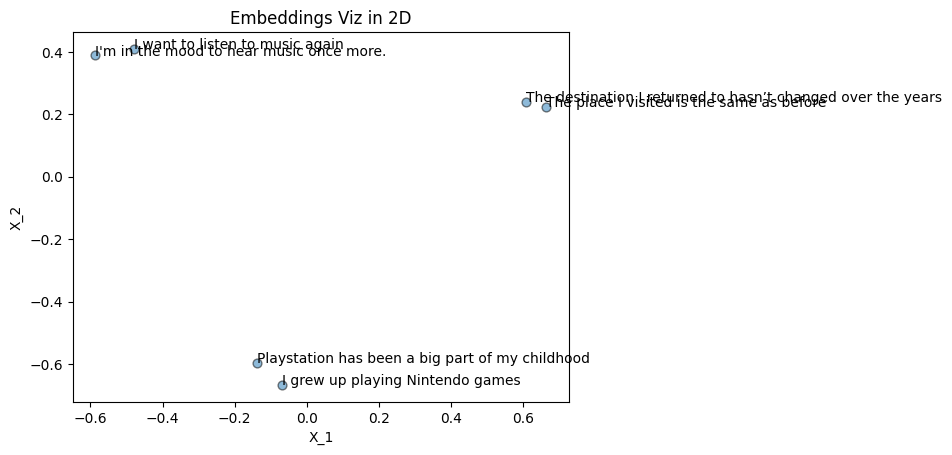

In [19]:
plot_2d(new_values[:,0], new_values[:,1], sentence_list)